## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[36, 66, 71],
       [80, 86, 98],
       [ 8, 15, 23],
       [37, 76, 88],
       [14, 16, 48],
       [ 4, 39, 85]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([36, 66, 71]), array([80, 86, 98]))

The lowest card in the game is

In [5]:
np.min(cards)

4

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

(array([6.4229e+04, 1.4684e+04, 8.7010e+03, 5.1420e+03, 3.0040e+03,
        1.8340e+03, 1.0260e+03, 6.1800e+02, 3.1600e+02, 2.0400e+02,
        1.0700e+02, 6.6000e+01, 3.3000e+01, 1.5000e+01, 9.0000e+00,
        5.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 1.  ,  2.05,  3.1 ,  4.15,  5.2 ,  6.25,  7.3 ,  8.35,  9.4 ,
        10.45, 11.5 , 12.55, 13.6 , 14.65, 15.7 , 16.75, 17.8 , 18.85,
        19.9 , 20.95, 22.  ]),
 <BarContainer object of 20 artists>)

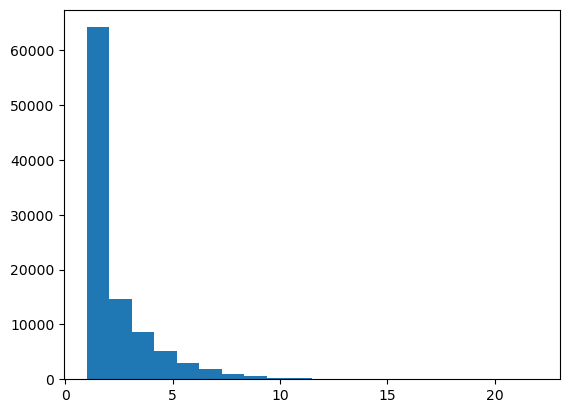

In [7]:
# To Do cell
N = 100
k = 8
n = 5
lowest_number = []
for i in range(100000):
    cards = sample_cards(N,n,k)
    lowest = np.min(cards)
    lowest_number.append(lowest)
plt.hist(lowest_number, bins = 20)

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [8]:
# To Do cell
cards
player_ids = np.tile(np.arange(1,n+1),(k,1)).T
player_ids

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5]])

In [9]:
# To Do cell
flat_cards,flat_ids = cards.flatten(),player_ids.flatten()
order_ids = np.argsort(flat_cards)
flat_cards[order_ids]
gap_cards = np.diff(flat_cards[order_ids])
np.max(gap_cards)
gap_cards

array([ 3,  2,  1,  1,  2,  2,  3,  3,  1,  1,  7,  1,  2,  4,  4,  1,  3,
        1,  1,  2,  1,  1,  3,  2,  2,  1,  7,  2,  1,  3,  1,  4,  1,  2,
       12,  1,  1,  2,  4])

(array([125., 207., 439.,  97.,  57.,  44.,  16.,  12.,   1.,   2.]),
 array([ 5. ,  6.4,  7.8,  9.2, 10.6, 12. , 13.4, 14.8, 16.2, 17.6, 19. ]),
 <BarContainer object of 10 artists>)

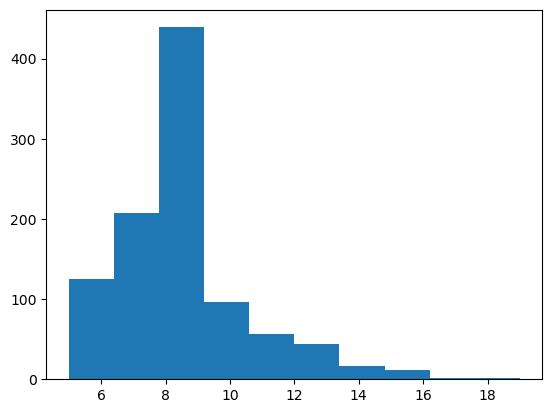

In [10]:
N = 100
k = 8
n = 5
max_gap_cards = []
max_gap_unique = []
for i in range(1000):
    cards = sample_cards(N,n,k)
    
    player_ids = np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids = cards.flatten(),player_ids.flatten()
    order_ids = np.argsort(flat_cards)
    gap_cards = np.diff(flat_cards[order_ids])
    max_gap = np.max(gap_cards)
    max_gap_cards.append(max_gap)
plt.hist(max_gap_cards)

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [11]:
flat_ids[order_ids]

array([5, 3, 2, 5, 4, 3, 5, 3, 2, 3, 5, 4, 5, 1, 2, 2, 2, 1, 1, 5, 1, 1,
       4, 4, 2, 4, 2, 2, 5, 3, 1, 1, 3, 1, 5, 4, 3, 4, 3, 4])

In [12]:
gap_cards = np.diff(flat_cards[order_ids])
gap_ids = np.diff(flat_ids[order_ids])

In [13]:
gap_unique = gap_cards * (gap_ids != 0)
gap_unique

array([1, 1, 1, 1, 4, 3, 1, 1, 1, 3, 3, 1, 1, 5, 0, 0, 1, 0, 3, 1, 0, 1,
       0, 1, 8, 1, 0, 4, 1, 3, 0, 1, 1, 4, 4, 3, 1, 5, 3])

In [14]:
np.max(gap_unique)

8

(array([ 43., 155., 235., 353., 100.,  51.,  41.,  10.,   6.,   6.]),
 array([ 4. ,  5.3,  6.6,  7.9,  9.2, 10.5, 11.8, 13.1, 14.4, 15.7, 17. ]),
 <BarContainer object of 10 artists>)

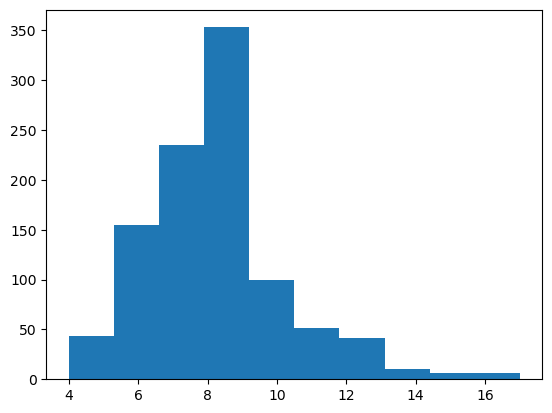

In [15]:
N = 100
k = 8
n = 5
max_gap_cards = []
max_gap_unique = []
for i in range(1000):
    cards = sample_cards(N,n,k)
    
    player_ids = np.tile(np.arange(1,n+1),(k,1)).T
    flat_cards,flat_ids = cards.flatten(),player_ids.flatten()
    order_ids = np.argsort(flat_cards)
    gap_cards = np.diff(flat_cards[order_ids])
    max_gap = np.max(gap_cards)

    flat_ids[order_ids]
    gap_cards = np.diff(flat_cards[order_ids])
    gap_ids = np.diff(flat_ids[order_ids])
    gap_unique = gap_cards * (gap_ids != 0)
    max_unique = np.max(gap_unique)
    max_gap_unique.append(max_unique)
plt.hist(max_gap_unique)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

(array([101., 210., 216., 316.,  67.,  40.,  35.,   5.,   7.,   3.]),
 array([ 5. ,  6.3,  7.6,  8.9, 10.2, 11.5, 12.8, 14.1, 15.4, 16.7, 18. ]),
 <BarContainer object of 10 artists>)

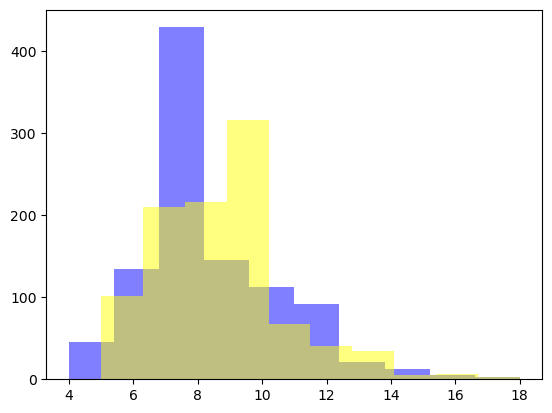

In [16]:
def diff(N,n,k):
    max_gap_cards = []
    max_gap_unique = []
    
    for i in range(1000):
        cards = sample_cards(N,n,k)

        player_ids = np.tile(np.arange(1,n+1),(k,1)).T
        flat_cards,flat_ids = cards.flatten(),player_ids.flatten()
        order_ids = np.argsort(flat_cards)
        gap_cards = np.diff(flat_cards[order_ids])
        max_gap = np.max(gap_cards)
        max_gap_cards.append(max_gap)

        flat_ids[order_ids]
        gap_cards = np.diff(flat_cards[order_ids])
        gap_ids = np.diff(flat_ids[order_ids])
        gap_unique = gap_cards * (gap_ids != 0)
        max_unique = np.max(gap_unique)
        max_gap_unique.append(max_unique)
    return max_gap_cards, max_gap_unique

N_value = 100
k_value = 8
n_value = 5
max_gap_cards, max_gap_unique = diff(N_value, n_value, k_value)
plt.hist(max_gap_unique, label='Dataset 1', color='blue',alpha=0.5)
plt.hist(max_gap_cards, label='Dataset 2', color='yellow',alpha=0.5)

#### We find that the largest gap among the all the cards is always larger or equal to the largest gap between cards of different players. This is because the largest gap among all the cards considers all possible gaps, including those between cards held by different players.

#### Now we try different choices of the number of cards and players to see when the difference between these two is larger.

#### First,we fix the number of cards per player (k) and change number of players (n).

(array([ 35., 187., 253., 236., 151.,  81.,  29.,   8.,  12.,   8.]),
 array([ 8. , 11.1, 14.2, 17.3, 20.4, 23.5, 26.6, 29.7, 32.8, 35.9, 39. ]),
 <BarContainer object of 10 artists>)

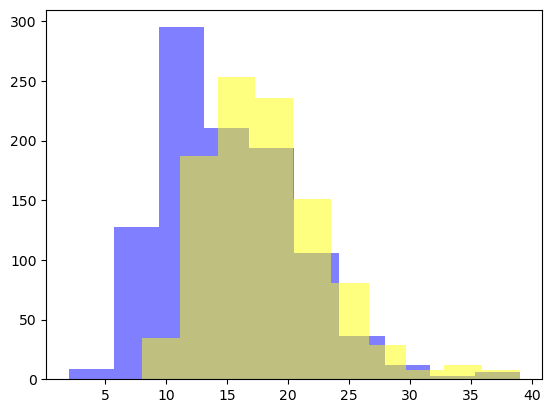

In [17]:
N_value = 100
k_value = 8
n_value = 2
max_gap_cards, max_gap_unique = diff(N_value, n_value, k_value)
plt.hist(max_gap_unique, label='Dataset 1', color='blue',alpha=0.5)
plt.hist(max_gap_cards, label='Dataset 2', color='yellow',alpha=0.5)

(array([160., 522.,   0., 219.,   0.,  80.,  13.,   0.,   3.,   3.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

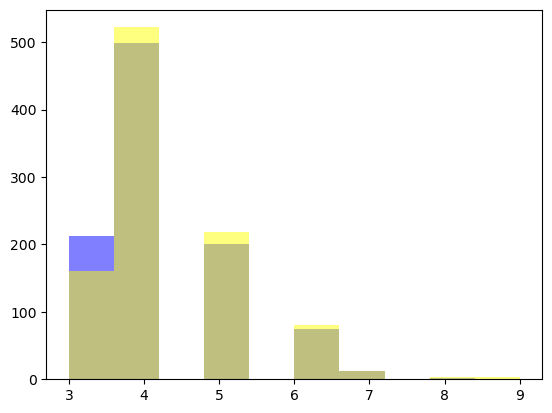

In [18]:
N_value = 100
k_value = 8
n_value = 9
max_gap_cards, max_gap_unique = diff(N_value, n_value, k_value)
plt.hist(max_gap_unique, label='Dataset 1', color='blue',alpha=0.5)
plt.hist(max_gap_cards, label='Dataset 2', color='yellow',alpha=0.5)

#### Then, we fix the number of players (n) and change the number of cards per player (k).

(array([ 39., 284., 285., 210., 107.,  40.,  21.,   7.,   4.,   3.]),
 array([ 8., 11., 14., 17., 20., 23., 26., 29., 32., 35., 38.]),
 <BarContainer object of 10 artists>)

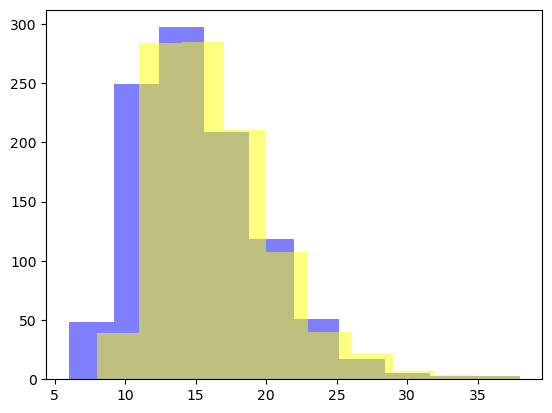

In [19]:
N_value = 100
k_value = 4
n_value = 5
max_gap_cards, max_gap_unique = diff(N_value, n_value, k_value)
plt.hist(max_gap_unique, label='Dataset 1', color='blue',alpha=0.5)
plt.hist(max_gap_cards, label='Dataset 2', color='yellow',alpha=0.5)

(array([ 73.,   0., 705.,   0.,   0., 199.,   0.,  18.,   0.,   5.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

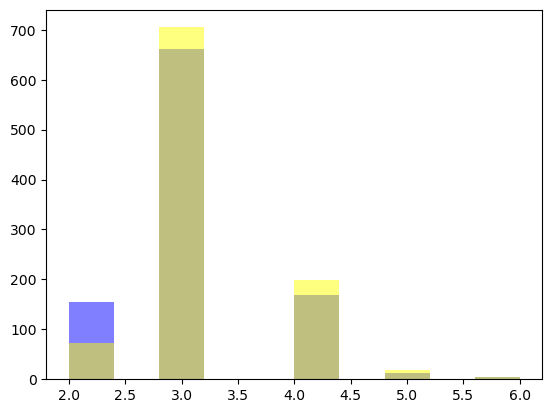

In [20]:
N_value = 100
k_value = 17
n_value = 5
max_gap_cards, max_gap_unique = diff(N_value, n_value, k_value)
plt.hist(max_gap_unique, label='Dataset 1', color='blue',alpha=0.5)
plt.hist(max_gap_cards, label='Dataset 2', color='yellow',alpha=0.5)

#### From above, we can see that when k is fixed and n becomes larger, the difference between two distributions becomes smaller; when n is fixed and k becomes larger, the difference also becomes smaller. 

#### Now we compare the mean of the two distributions and see how this depends on the total number of players n.

(array([34.,  6.,  3.,  2.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([ 1.37791667,  4.310225  ,  7.24253333, 10.17484167, 13.10715   ,
        16.03945833, 18.97176667, 21.904075  , 24.83638333, 27.76869167,
        30.701     ]),
 <BarContainer object of 10 artists>)

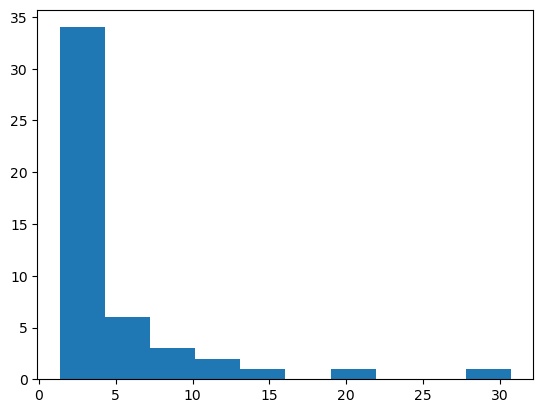

In [21]:
# To Do cell

max_gap_cards = []
max_gap_unique = []
def mean_diff (N,k,n):
    for i in range(1000):
        cards = sample_cards(N,n,k)
        player_ids = np.tile(np.arange(1,n+1),(k,1)).T
        flat_cards,flat_ids = cards.flatten(),player_ids.flatten()
        order_ids = np.argsort(flat_cards)
        gap_cards = np.diff(flat_cards[order_ids])
        max_gap = np.max(gap_cards)
        max_gap_cards.append(max_gap)
        
        flat_ids[order_ids]
        gap_cards = np.diff(flat_cards[order_ids])
        gap_ids = np.diff(flat_ids[order_ids])
        gap_unique = gap_cards * (gap_ids != 0)
        max_unique = np.max(gap_unique)
        max_gap_unique.append(max_unique)
        
    return np.mean(max_gap_cards)-np.mean(max_gap_unique)


n = np.arange(2,50)
diff_mean_distrn = []
for i in n:
    diff_mean_distrn.append(mean_diff(1000,10,i))
plt.hist(diff_mean_distrn)

#### When n becomes larger, the difference of the mean of the two distributions becomes smaller. 

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

#### To derive Binomial distribution, define an event: whether a player has an even card. In this case, we assume that each play is given one card only.

In [22]:
def sample_game(N, n, k):
    """
    Simulates a player's turn in the card game where players receive cards based on the sample_cards() function.
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 1 if the player has an even card, 0 otherwise.
    """
    # Generate the cards for the players using sample_cards()
    player_cards = sample_cards(N, n, k)
    
    # Initialize an empty array to store the results for each player
    results = np.zeros(n, dtype=int)
    
    # Loop through each player and check if they have at least one even card
    for i in range(n):
        if np.any(player_cards[i] % 2 == 0):
            results[i] = 1  # Player has at least one even card
    
    return sum(results)

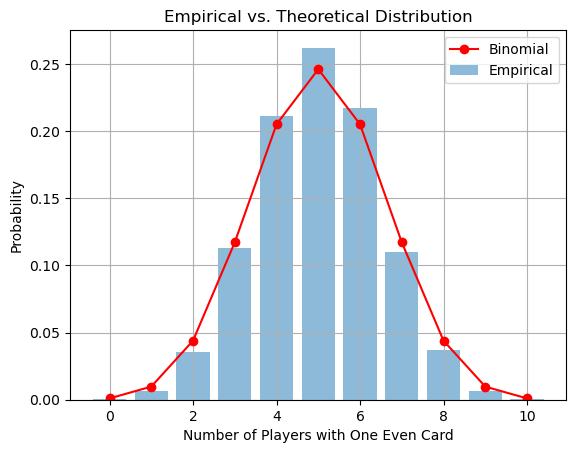

In [57]:
from scipy.stats import binom

# Define parameters for the simulation
N = 100   # Total number of cards
n = 10     # Number of players
k = 1     # Number of cards per player
num_simulations = 10000  # Number of simulations to run

# Simulate the game multiple times and record the results
results = np.zeros(num_simulations, dtype=int)
for i in range(num_simulations):
    result = sample_game(N, n, k)
    results[i] = result

# Calculate empirical probabilities
empirical_probs = np.bincount(results) / num_simulations

# Calculate theoretical binomial distribution probabilities
x = np.arange(n + 1)  # Possible number of players with one even card
p = 0.5  # Probability of a player having one even card (assuming even and odd cards are equally likely)
theoretical_probs = binom.pmf(x, n, p)

# Plot the empirical and theoretical distributions
plt.bar(x, empirical_probs, alpha=0.5, label='Empirical')
plt.plot(x, theoretical_probs, marker='o', linestyle='-', label='Binomial', color='red')

plt.xlabel('Number of Players with One Even Card')
plt.ylabel('Probability')
plt.legend()
plt.title('Empirical vs. Theoretical Distribution')
plt.grid(True)
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

(array([22.28,  9.48,  3.6 ,  2.04,  1.68,  0.44,  0.36,  0.08,  0.  ,
         0.04]),
 array([0.01 , 0.035, 0.06 , 0.085, 0.11 , 0.135, 0.16 , 0.185, 0.21 ,
        0.235, 0.26 ]),
 <BarContainer object of 10 artists>)

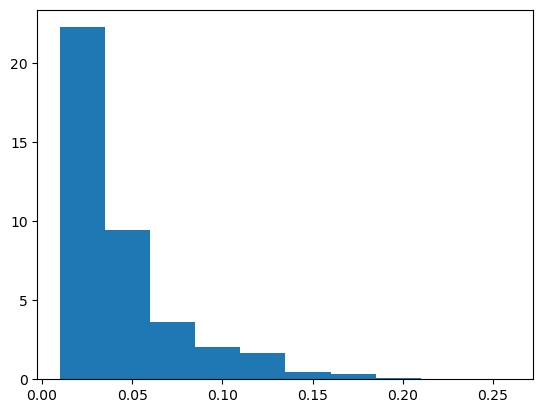

In [24]:
N = 100
k = 5
n = 5
lowest_number = []
for i in range(1000):
    cards = sample_cards(N,n,k)
    lowest = np.min(cards)/N
    lowest_number.append(lowest)
plt.hist(lowest_number, density=True)

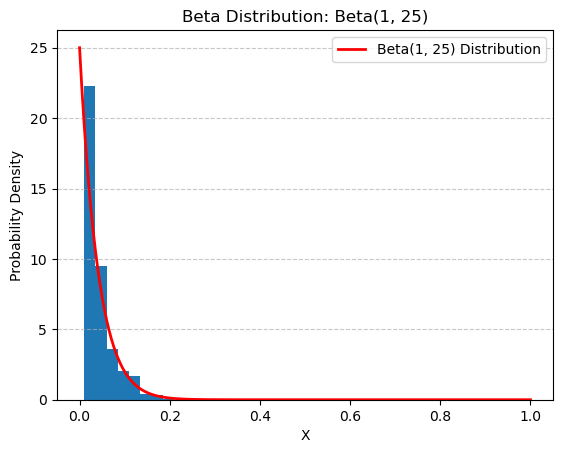

In [25]:
# Generate the Beta distribution
from scipy.stats import beta
k_beta = 1
n_beta = k*n
x = np.linspace(0, 1, 1000)  # Define the range from 0 to 1
beta_pdf = beta.pdf(x, k_beta, n_beta - k_beta + 1) 

# Plot the Beta distribution
plt.plot(x,beta_pdf,'r-', lw=2, label=f'Beta({k_beta}, {n_beta - k_beta + 1}) Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution: Beta({k_beta}, {n_beta - k_beta + 1})')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.hist(lowest_number, density=True)
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

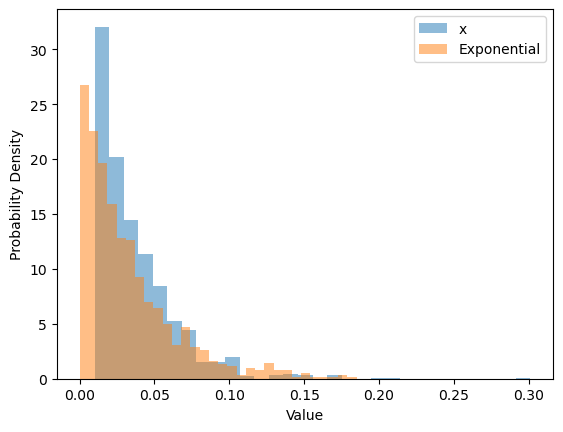

In [26]:
from scipy.stats import expon
N = 100
k = 6
n = 5
lowest_number = []
for i in range(1000):
    cards = sample_cards(N,n,k)
    lowest = np.min(cards)
    lowest_number.append(lowest)
x = [-np.log(1-(lowest/N)) for lowest in lowest_number]

# Parameters for the exponential distribution
total_cards = n * k

# Generate random samples from an exponential distribution
exponential_samples = np.random.exponential(scale=1 / (n * k),size=len(x))

# Create histograms for both x and the exponential samples
plt.hist(x,density=True, bins=30, alpha=0.5, label='x')
plt.hist(exponential_samples,density=True, bins=30, alpha=0.5, label='Exponential')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

#### We first define a new function called 'sample_cards_repetition' where the sampling is sampling with replacement.

In [27]:
def sample_cards_repetition(N, n, k):    
    assert n * k <= N, "There are not enough cards for all the players!"
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

#### First, binomial distribution. We make sampling with and without replacement as  𝑛∗𝑘<<𝑁 to see if there is any difference.

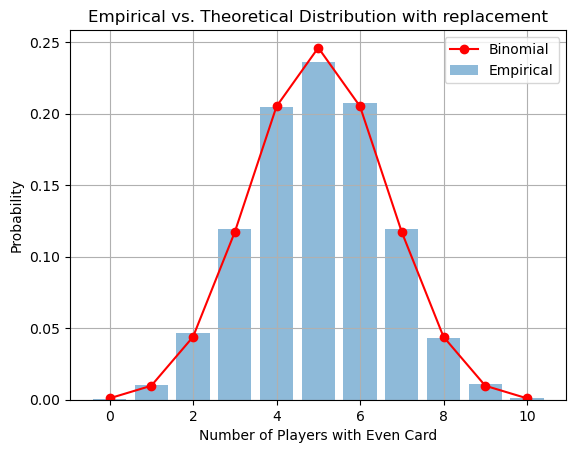

In [56]:
def sample_game_repetition(N, n, k):
    
    # Generate the cards for the players using sample_cards()
    player_cards = sample_cards_repetition(N, n, k)
    
    # Initialize an empty array to store the results for each player
    results = np.zeros(n, dtype=int)
    
    # Loop through each player and check if they have at least one even card
    for i in range(n):
        if np.any(player_cards[i] % 2 == 0):
            results[i] = 1  # Player has at least one even card
    
    return sum(results)

# Define parameters for the simulation
N = 10000   # Total number of cards
n = 10     # Number of players
k = 1     # Number of cards per player
num_simulations = 10000  # Number of simulations to run

# Simulate the game multiple times and record the results
results = np.zeros(num_simulations, dtype=int)
for i in range(num_simulations):
    result = sample_game_repetition(N, n, k)
    results[i] = result

# Calculate empirical probabilities
empirical_probs = np.bincount(results) / num_simulations

# Calculate theoretical binomial distribution probabilities
x = np.arange(n + 1)  # Possible number of players with one even card
p = 0.5  # Probability of a player having one even card (assuming even and odd cards are equally likely)
theoretical_probs = binom.pmf(x, n, p)

# Plot the empirical and theoretical distributions
plt.bar(np.arange(len(empirical_probs)), empirical_probs, alpha=0.5, label='Empirical')
plt.plot(x, theoretical_probs, marker='o', linestyle='-', label='Binomial', color='red')

plt.xlabel('Number of Players with Even Card')
plt.ylabel('Probability')
plt.legend()
plt.title('Empirical vs. Theoretical Distribution with replacement')
plt.grid(True)
plt.show()

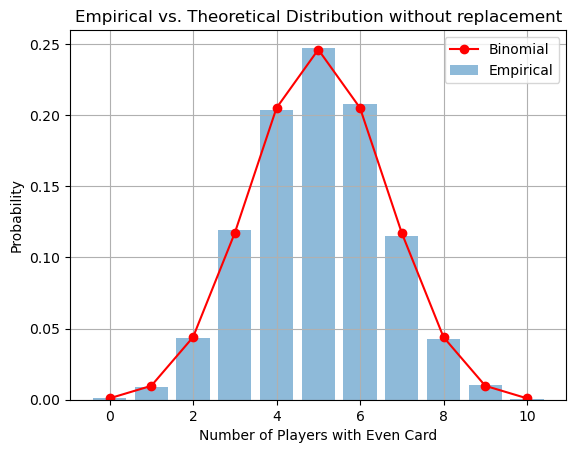

In [48]:
# Define parameters for the simulation
N = 10000   # Total number of cards
n = 10     # Number of players
k = 1     # Number of cards per player
num_simulations = 10000  # Number of simulations to run

# Simulate the game multiple times and record the results
results = np.zeros(num_simulations, dtype=int)
for i in range(num_simulations):
    result = sample_game(N, n, k)
    results[i] = result

# Calculate empirical probabilities
empirical_probs = np.bincount(results) / num_simulations

# Calculate theoretical binomial distribution probabilities
x = np.arange(n + 1)  # Possible number of players with one even card
p = 0.5  # Probability of a player having one even card (assuming even and odd cards are equally likely)
theoretical_probs = binom.pmf(x, n, p)

# Plot the empirical and theoretical distributions
plt.bar(np.arange(len(empirical_probs)), empirical_probs, alpha=0.5, label='Empirical')
plt.plot(x, theoretical_probs, marker='o', linestyle='-', label='Binomial', color='red')

plt.xlabel('Number of Players with Even Card')
plt.ylabel('Probability')
plt.legend()
plt.title('Empirical vs. Theoretical Distribution without replacement')
plt.grid(True)
plt.show()

#### Then, exponential distribution. We make sampling with and without replacement as  𝑛∗𝑘<<𝑁 to see if there is any difference.

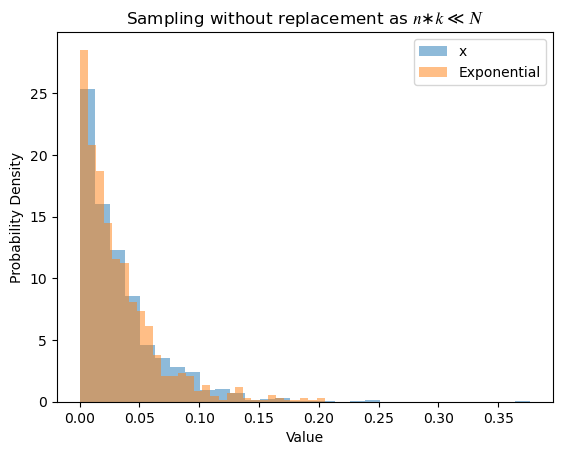

In [49]:
# To Do cell
N = 10000
k = 6
n = 5
lowest_number = []
for i in range(1000):
    cards = sample_cards(N,n,k)
    lowest = np.min(cards)
    lowest_number.append(lowest)
x = [-np.log(1-(lowest/N)) for lowest in lowest_number]

# Parameters for the exponential distribution
total_cards = n * k

# Generate random samples from an exponential distribution
exponential_samples = np.random.exponential(scale=1 / (n * k),size=len(x))

# Create histograms for both x and the exponential samples
plt.hist(x,density=True, bins=30, alpha=0.5, label='x')
plt.hist(exponential_samples,density=True, bins=30, alpha=0.5, label='Exponential')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(r"Sampling without replacement as $𝑛∗𝑘\ll𝑁$")
plt.legend()

# Show the plot
plt.show()

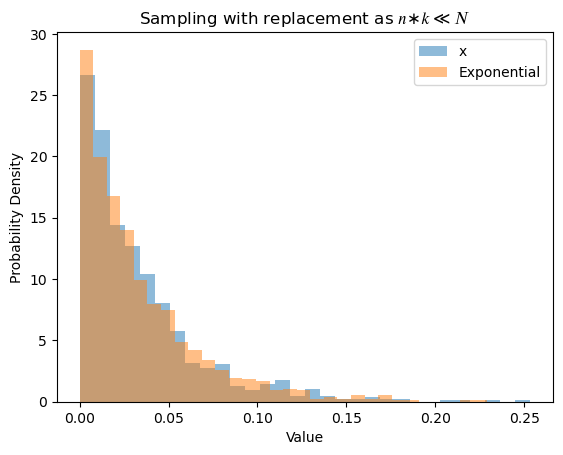

In [50]:
lowest_number = []
for i in range(1000):
    cards = sample_cards_repetition(N,n,k)
    lowest = np.min(cards)
    lowest_number.append(lowest)
x = [-np.log(1-(lowest/N)) for lowest in lowest_number]

# Parameters for the exponential distribution
total_cards = n * k

# Generate random samples from an exponential distribution
exponential_samples = np.random.exponential(scale=1 / (n * k),size=len(x))

# Create histograms for both x and the exponential samples
plt.hist(x,density=True, bins=30, alpha=0.5, label='x')
plt.hist(exponential_samples,density=True, bins=30, alpha=0.5, label='Exponential')

# Add labels and a legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(r"Sampling with replacement as $𝑛∗𝑘\ll𝑁$")
plt.legend()

# Show the plot
plt.show()

#### Then Beta distribution.

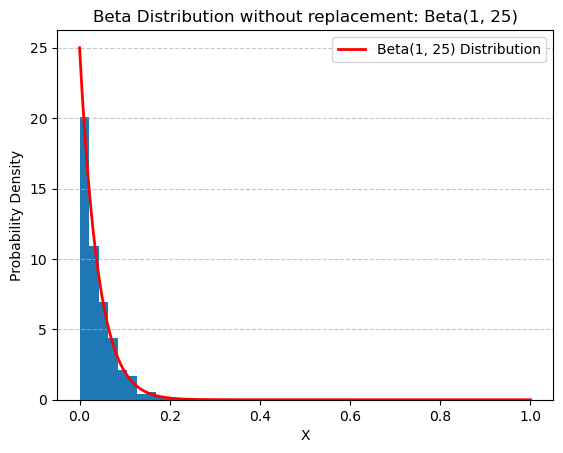

In [51]:
N = 10000
k = 5
n = 5
lowest_number = []
for i in range(1000):
    cards = sample_cards(N,n,k)
    lowest = np.min(cards)/N
    lowest_number.append(lowest)
    
from scipy.stats import beta
k_beta = 1
n_beta = k*n
x = np.linspace(0, 1, 1000)  # Define the range from 0 to 1
beta_pdf = beta.pdf(x, k_beta, n_beta - k_beta + 1) 

# Plot the Beta distribution
plt.plot(x,beta_pdf,'r-', lw=2, label=f'Beta({k_beta}, {n_beta - k_beta + 1}) Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution without replacement: Beta({k_beta}, {n_beta - k_beta + 1})')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.hist(lowest_number, density=True)
plt.show()

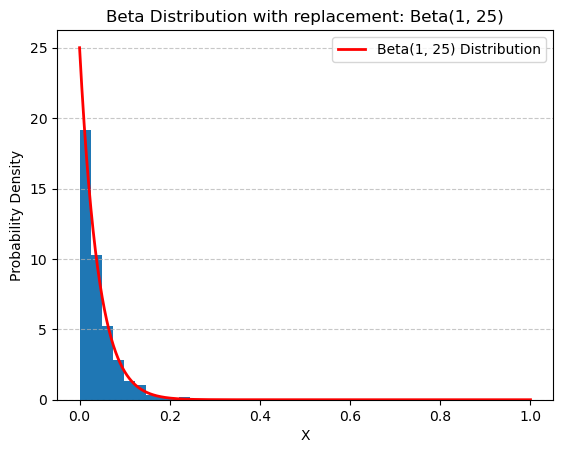

In [52]:
N = 10000
k = 5
n = 5
lowest_number = []
for i in range(1000):
    cards = sample_cards_repetition(N,n,k)
    lowest = np.min(cards)/N
    lowest_number.append(lowest)
    
from scipy.stats import beta
k_beta = 1
n_beta = k*n
x = np.linspace(0, 1, 1000)  # Define the range from 0 to 1
beta_pdf = beta.pdf(x, k_beta, n_beta - k_beta + 1) 

# Plot the Beta distribution
plt.plot(x,beta_pdf,'r-', lw=2, label=f'Beta({k_beta}, {n_beta - k_beta + 1}) Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title(f'Beta Distribution with replacement: Beta({k_beta}, {n_beta - k_beta + 1})')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.hist(lowest_number, density=True)
plt.show()

#### To conclude, when 𝑛∗𝑘<<𝑁, there is no significant difference in distritutions between sampling with and without repetition .

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Jingsi Chen
- Member No2: 
- Member No3: